## Zadanie 1 - metody poszukiwania pierwiastków

### a) zestawienie różnych metod

In [2]:
using Roots,Plots,ForwardDiff,LinearAlgebra,Statistics,Measures,DataFrames,CSV,Symbolics

In [2]:
tests = Function[]
example(x) = sin(x) - x/2
example2(x) = cos(x) - x
example3(x) = (x+3)*(x-1)^2
example4(x) =  20.0*x/(100.0*x*x + 1.0)
example5(x) =  x*exp(-x)
example6(x) = 2*x-exp(-x)
push!(tests,example)
push!(tests,example2)
push!(tests,example3)
push!(tests,example4)
push!(tests,example5)
push!(tests,example6)
df = DataFrame(What=Function[],How=Function[],Iters=Float64[],Calls=Float64[])
tracker = Roots.Tracks()
bisection(f) = find_zero(f, (0, 1), Bisection(), tracks = tracker) 
D(f) = x->ForwardDiff.derivative(f, float(x))
newtonMethod(f) = find_zero((f, D(f)),0, Roots.Newton(),tracks = tracker)
steffenson(f) = find_zero(f, 0, Order2(),tracks = tracker)
for test in tests
    res1 = bisection(test)
    if test(res1) != 0
        println("Error ocured ",test," ", bisection," ", test(res1))
    end
    push!(df,(test,bisection,tracker.steps,tracker.fncalls))
    res2 = newtonMethod(test)
    if test(res2) != 0
        println("Error ocured ",test," ", newtonMethod," ", test(res2))
    end
    push!(df,(test,newtonMethod,tracker.steps, tracker.fncalls))
    res3 = steffenson(test)
    if test(res3) != 0
        println("Error ocured ",test," ", steffenson," ", test(res3))
    end
    push!(df,(test,steffenson,tracker.steps, tracker.fncalls))
end
df

Error ocured example3 newtonMethod 4.564959859473074e-16
Error ocured example3 steffenson 5.483192153677992e-16
Error ocured example6 newtonMethod -1.1102230246251565e-16


,What,How,Iters,Calls
,Function,Function,Float64,Float64
1,example,bisection,0.0,3.0
2,example,newtonMethod,1.0,5.0
3,example,steffenson,1.0,7.0
4,example2,bisection,61.0,70.0
5,example2,newtonMethod,66.0,80.0
6,example2,steffenson,72.0,90.0
7,example3,bisection,72.0,93.0
8,example3,newtonMethod,98.0,145.0
9,example3,steffenson,126.0,195.0


### b) przykład trudnej funkcji - Repeller

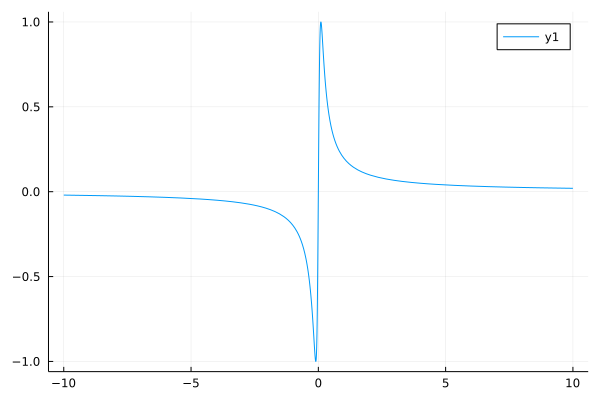

In [20]:
Repeller(x) = 20.0*x/(100.0*x*x+1.0)
xs = -10:10
plot(Repeller, extrema(xs)...)

In [3]:
table = DataFrame(How=Function[],Iters=Float64[],Calls=Float64[])
bisection(Repeller)
push!(table,(bisection, tracker.steps, tracker.fncalls))
newtonMethod(Repeller)
push!(table,(newtonMethod,tracker.steps, tracker.fncalls))
steffenson(Repeller)
push!(table,(steffenson, tracker.steps, tracker.fncalls))

,How,Iters,Calls
,Function,Float64,Float64
1,bisection,198.0,293.0
2,newtonMethod,199.0,295.0
3,steffenson,199.0,297.0


### c) funckje niewspółpracujące :(((

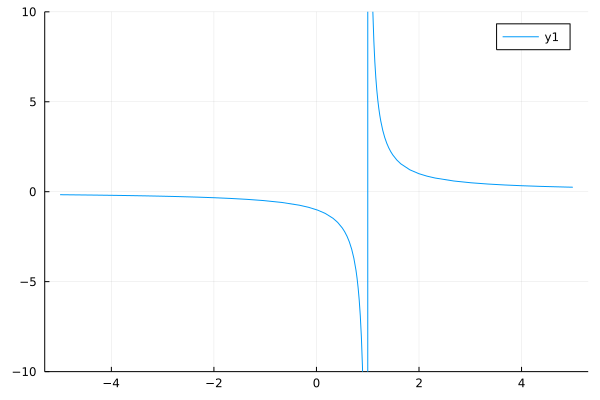

In [17]:
f(x) = x/(x-1) - 1
xs = -1:2
plot(f, ylim = (-10,10))

In [5]:
res = find_zero(f,(-1,1),Bisection()) # funkcja nie jest ciągła na podanym przedziale
f(res)

-9.007199254740992e15

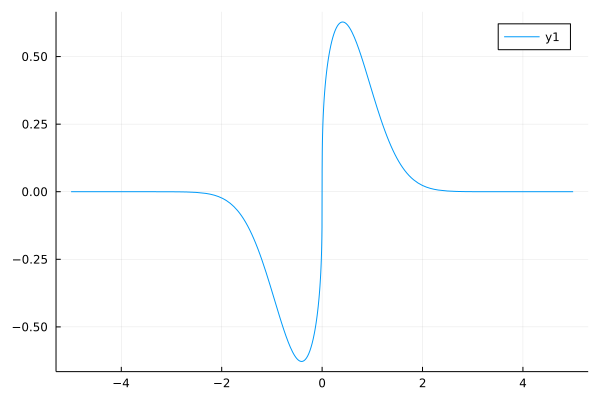

In [6]:
function newtonPatology(x)
    if x < 0.0
        fx = -abs(x)^(1.0/3.0)*exp(-x^2)
    elseif x == 0.0
        fx = 0.0
    else
        fx = abs(x)^(1.0/3.0)*exp(-x^2)
    end
    return fx
end
plot(newtonPatology)

In [7]:
newtonMethod(newtonPatology) #pochodna w zerze właściwie pionowa

LoadError: Roots.ConvergenceFailed("Algorithm failed to converge")

In [8]:
res3 = steffenson(f) # analogicznie jak przy metodzie bisekcji - funkcja nie jest ciągła
f(res3)

-2.5416772276853905e-6

## Zadanie 2 - wstęga Newtona

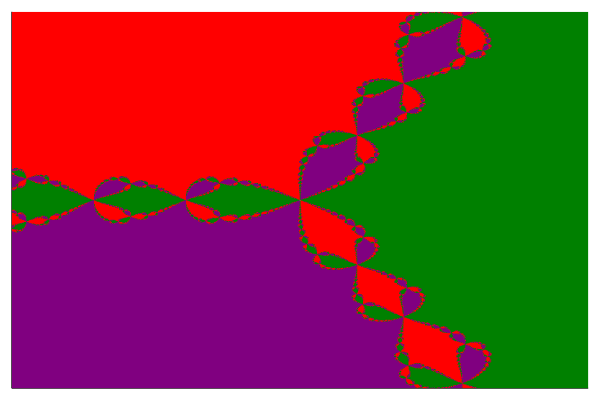

In [11]:
f(x) = x^3 - 1
function get_map(f)
    @variables x
    Dx = Differential(x)
    map = x - f(x) / Dx(f(x)) |> expand_derivatives
    update_expr = build_function(map, x)
    return eval(update_expr)
end
function applyiteratively(x, update; n=100)
    for i in 1:n
        x = update(x)
    end
    return x
end
update = get_map(f)
lower = -2 - 2im
upper = 2 + 2im
step = 0.5e-2
Z0 = [a+b*im for b in real(lower):step:real(upper),
                    a in imag(lower):step:imag(upper)]
Z100 = applyiteratively.(Z0, update)
heatmap(angle.(Z100), colorbar=false, color=:rainbow, ticks=false)